In [249]:
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

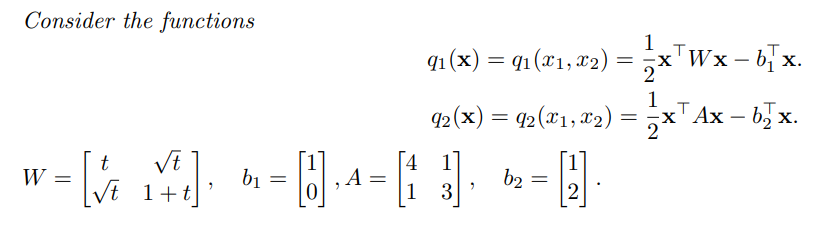

In [250]:
def W(t):
    return np.array([[t, np.sqrt(t)],
                     [np.sqrt(t), t+1]])

In [251]:
## I forgot how np multiplication works
A = [[5, 0],
      [1, 5]]
 
B = [5, 2]
 
print(np.matmul(A,B))
print(np.matmul(B,A))

[25 15]
[27 10]


In [252]:
A = np.array([[4,1],[1,3]])
b1 = np.array([1,0])
b2 = np.array([1,2])

def q1(x,t=0.001):
    return 0.5*np.dot(np.matmul(W(t),x),x) - np.dot(b1,x)

def q2(x):
    return 0.5*np.dot(np.matmul(A,x),x) - np.dot(b2,x)

def dq1_dx(x,t=0.001):
    return np.matmul(W(t),x) - b1

def dq2_dx(x):
    return np.matmul(A,x) - b2

In [253]:
x = np.array([1,2])
print(q1(x,1))
print(q2(x))

5.5
5.0


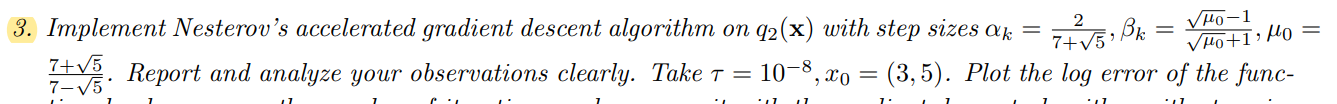

In [254]:
# def Aplha_k(t):
#     return 2/(3+np.sqrt(9-4*t*t))
# def Beta_k(t):
#     mu0 = (3+np.sqrt(9-4*t*t))/(3-np.sqrt(9-4*t*t))
#     return (np.sqrt(mu0)-1)/(np.sqrt(mu0)+1)

In [255]:
Aplha_k = 2/(7+np.sqrt(5))
mu0 = (7+np.sqrt(5))/(7-np.sqrt(5))
Beta_k = (np.sqrt(mu0)-1)/(np.sqrt(mu0)+1)


In [256]:
# checking numpy operations

In [257]:

# Defining the norm function
def Norm(x):
    sum = 0
    for i in range(len(x)):
        sum += x[i]**2
    return np.sqrt(sum)

In [258]:
def gradient_descent(x0, step_length,tolerance,f,df_dx):

    iter_list = [0]
    minimizer_list = [x0.tolist()]
    function_value_list = [f(x0)]

    iter = 0
    x = x0
    # print(f"Iteration: {iter}, df_dx: {df_dx(x)}, Norm: {Norm(df_dx(x))}")
    while(Norm(df_dx(x)) > tolerance):
        # print(f"Iteration: {iter}, df_dx: {df_dx(x)}")
        x = x - step_length*df_dx(x)
        iter = iter + 1
        # print(f"f(x) : {f(x)}")
        iter_list.append(iter)
        minimizer_list.append(x.tolist())
        function_value_list.append(f(x))

    return minimizer_list, function_value_list, iter_list

In [259]:
x0 = np.array([3,5])
step_length = Aplha_k
t = 1
tolerance = 0.1**8

minimizer_lst, function_value_lst, iter_lst = gradient_descent(x0,step_length,tolerance,q2,dq2_dx)

print(minimizer_lst)
print(function_value_lst)
print(iter_lst)

[[3, 5], [-0.4646778345456073, 1.5353221654543927], [-0.17810801371882756, 1.071642455206695], [-0.03934991855762729, 0.8471271410216807], [0.027837229472181688, 0.7384160519022793], [0.06036947816826861, 0.6857777677815462], [0.07612170513814229, 0.6602901291457878], [0.08374898774096652, 0.6479489266526174], [0.08744214427144353, 0.6419732738605319], [0.08923038339523773, 0.6390798421782206], [0.09009625494372994, 0.6376788325828687], [0.09051551293250357, 0.6370004589069781], [0.090718519096012, 0.6366719880344958], [0.09081681538022343, 0.6365129413056738], [0.09086441077990388, 0.6364359303312828], [0.09088745663650889, 0.636398641351996], [0.090898615519725, 0.6363805858996758], [0.09090401868944721, 0.6363718433874183], [0.09090663492285352, 0.6363676102328443], [0.09090790171208804, 0.6363655605248063], [0.0909085150958025, 0.6363645680491081], [0.09090881209831163, 0.6363640874889537], [0.09090895590795042, 0.6363638548000703], [0.09090902554107326, 0.6363637421313106], [0.090

In [260]:

# Combine into a table
table = zip(iter_lst, minimizer_lst, function_value_lst)
# Define column headers
headers = ["Iterations", "Minimizer", "Function Value"]
# Print the table
print(tabulate(table, headers=headers, tablefmt="grid"))

+--------------+--------------------------------------------+------------------+
|   Iterations | Minimizer                                  |   Function Value |
+==============+============================================+==================+
|            0 | [3, 5]                                     |        57.5      |
+--------------+--------------------------------------------+------------------+
|            1 | [-0.4646778345456073, 1.5353221654543927]  |         0.648276 |
+--------------+--------------------------------------------+------------------+
|            2 | [-0.17810801371882756, 1.071642455206695]  |        -0.369974 |
+--------------+--------------------------------------------+------------------+
|            3 | [-0.03934991855762729, 0.8471271410216807] |        -0.608705 |
+--------------+--------------------------------------------+------------------+
|            4 | [0.027837229472181688, 0.7384160519022793] |        -0.664677 |
+--------------+------------

In [261]:
print(iter_lst)
print(minimizer_lst)
print(function_value_lst)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[[3, 5], [-0.4646778345456073, 1.5353221654543927], [-0.17810801371882756, 1.071642455206695], [-0.03934991855762729, 0.8471271410216807], [0.027837229472181688, 0.7384160519022793], [0.06036947816826861, 0.6857777677815462], [0.07612170513814229, 0.6602901291457878], [0.08374898774096652, 0.6479489266526174], [0.08744214427144353, 0.6419732738605319], [0.08923038339523773, 0.6390798421782206], [0.09009625494372994, 0.6376788325828687], [0.09051551293250357, 0.6370004589069781], [0.090718519096012, 0.6366719880344958], [0.09081681538022343, 0.6365129413056738], [0.09086441077990388, 0.6364359303312828], [0.09088745663650889, 0.636398641351996], [0.090898615519725, 0.6363805858996758], [0.09090401868944721, 0.6363718433874183], [0.09090663492285352, 0.6363676102328443], [0.09090790171208804, 0.6363655605248063], [0.0909085150958025, 0.6363645680491081], [0.09090881209831163, 0.6363

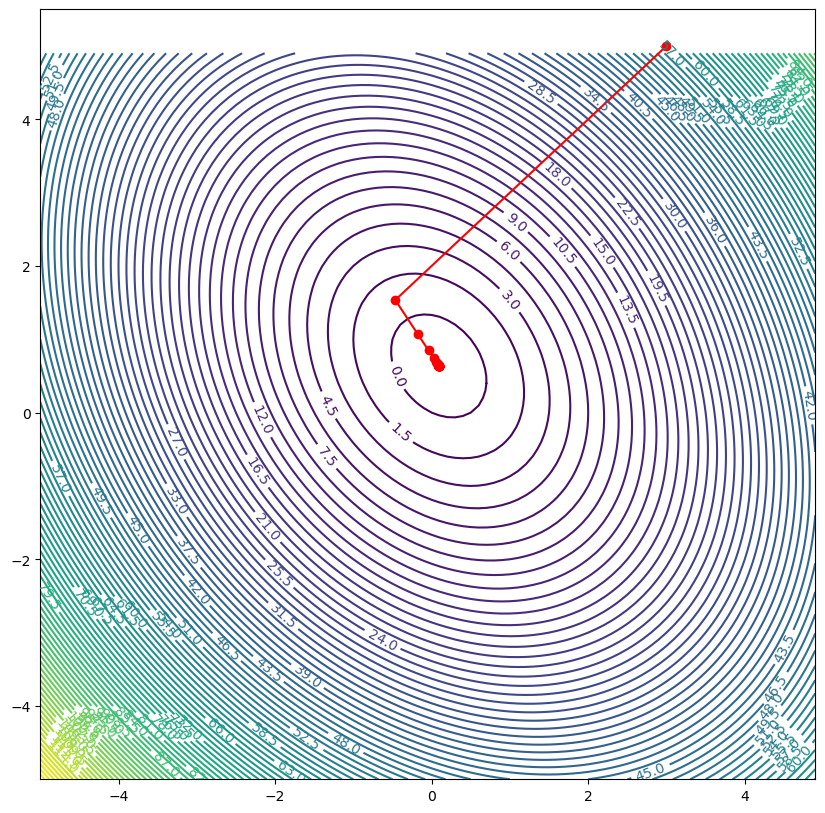

In [262]:
x_range = np.arange(-5,5,0.1)
y_range = np.arange(-5,5,0.1)
X,Y = np.meshgrid(x_range,y_range)
Z = np.array([[q2(np.array([x1_i, x2_i])) for x1_i, x2_i in zip(row_x1, row_x2)] 
              for row_x1, row_x2 in zip(X, Y)])
# Z = q1(np.array([X,Y]),t=0.001)

plt.figure(figsize=(10,10))
contour = plt.contour(X,Y,Z, levels = 100)
plt.clabel(contour, inline = True)
plt.plot([x[0] for x in minimizer_lst], [x[1] for x in minimizer_lst], c='r', marker = 'o')
plt.show()

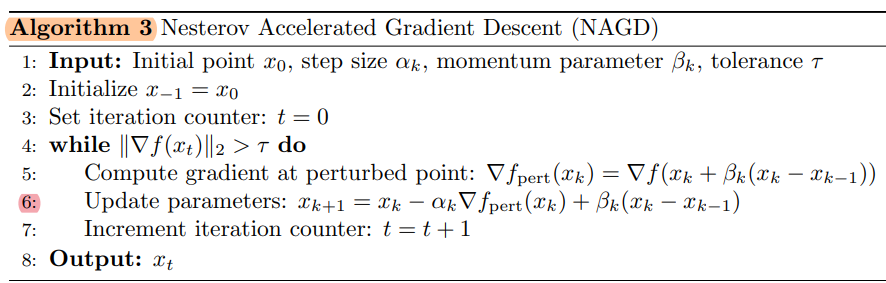

In [263]:
def Nesterov_gradient_descent(x0,f,df_dx,tolerance,momentum_coefficient,step_length):

    x_current = x0
    x_previous = x0

    iter = 0
    iteration_list = [0]
    minimizer_list = [x0.tolist()]
    function_value_list = [f(x0)]

    while Norm(df_dx(x_current)) > tolerance:
        perturbed_point = x_current + momentum_coefficient*(x_current - x_previous)
        # perturbed_point = x_current
        x_next = perturbed_point - step_length*df_dx(perturbed_point)

        iter += 1
        x_previous = x_current
        x_current = x_next

        iteration_list.append(iter)
        minimizer_list.append(x_current.tolist())
        function_value_list.append(f(x_current))
    return minimizer_list, function_value_list, iteration_list

In [264]:
x0 = np.array([3,5])
step_length = Aplha_k
tolerance = 0.1**8
momentum_coeff = Beta_k

print(f"step_length: {step_length}, Momentum coeff: {momentum_coeff}")

minimizer_list, function_value_list, iteration_list = Nesterov_gradient_descent(x0,q2,dq2_dx,tolerance,momentum_coeff,step_length)


# Combine into a table
table = zip(iteration_list, minimizer_list, function_value_list)
# Define column headers
headers = ["Iterations", "Minimizer", "Function Value"]
# Print the table
print(tabulate(table, headers=headers, tablefmt="grid"))

step_length: 0.21654236465910046, Momentum coeff: 0.16401577366144043
+--------------+--------------------------------------------+------------------+
|   Iterations | Minimizer                                  |   Function Value |
+==============+============================================+==================+
|            0 | [3, 5]                                     |        57.5      |
+--------------+--------------------------------------------+------------------+
|            1 | [-0.4646778345456073, 1.5353221654543927]  |         0.648276 |
+--------------+--------------------------------------------+------------------+
|            2 | [-0.13110604284790295, 0.9955916687993064] |        -0.469424 |
+--------------+--------------------------------------------+------------------+
|            3 | [0.009899869764871172, 0.7674393095771406] |        -0.65354  |
+--------------+--------------------------------------------+------------------+
|            4 | [0.06288241375056404, 

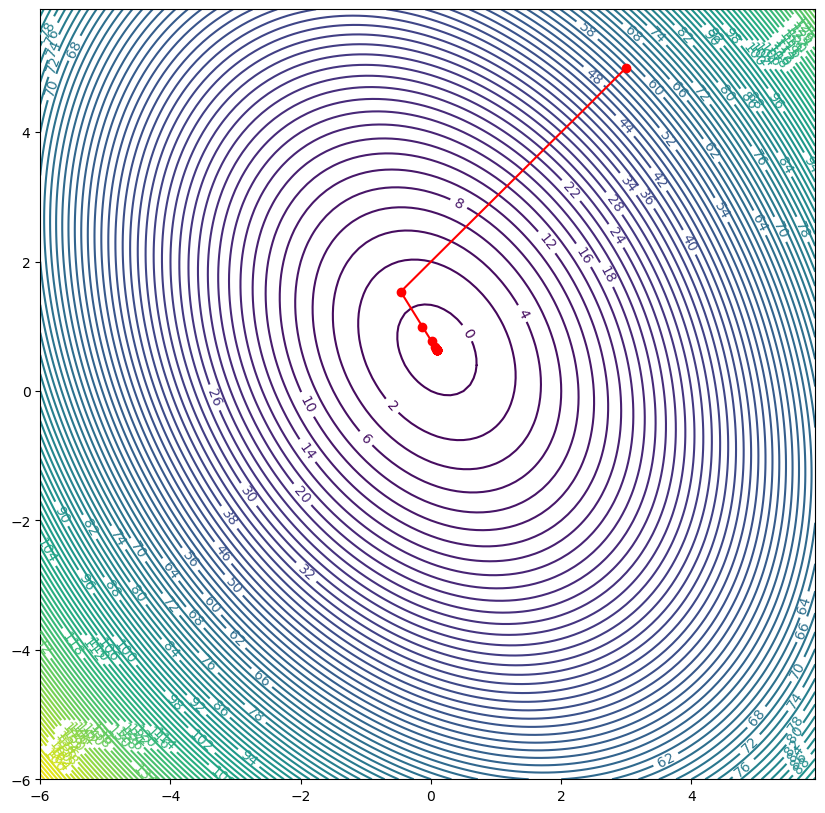

In [265]:
x_range = np.arange(-6,6,0.1)
y_range = np.arange(-6,6,0.1)
X,Y = np.meshgrid(x_range,y_range)
Z = np.array([[q2(np.array([x1_i, x2_i])) for x1_i, x2_i in zip(row_x1, row_x2)] 
              for row_x1, row_x2 in zip(X, Y)])
# Z = q1(np.array([X,Y]),t=0.001)

plt.figure(figsize=(10,10))
contour = plt.contour(X,Y,Z, levels = 100)
plt.clabel(contour, inline = True)
plt.plot([x[0] for x in minimizer_list], [x[1] for x in minimizer_list], c='r', marker = 'o')
plt.show()

### Comparing the algorithms
Both attained minimum value at x = [0.09,0.636] approximately with a minimum value of around 0.69

Now we'll compare the absolute value of the function with the numbre of iterations for both the methods

In [266]:
print(iter_lst, iteration_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


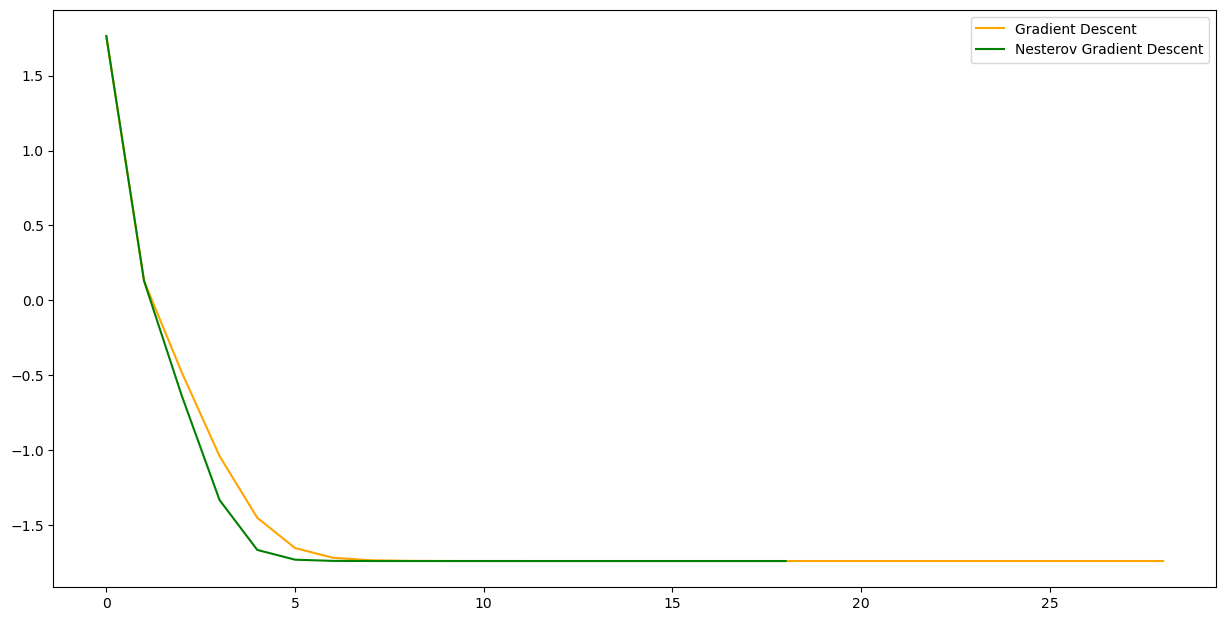

In [267]:
plt.figure(figsize=(15,7.5))
plt.plot(iter_lst,np.log10(np.array(function_value_lst)+0.7), c = 'orange', label = "Gradient Descent")
plt.plot(iteration_list, np.log10(np.array(function_value_list)+0.7), c = 'green', label = "Nesterov Gradient Descent")
plt.legend()
plt.show()